In [1]:
import pickle
import os

from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import sklearn
from sklearn import set_config


import xgboost as xgb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
set_config(transform_output = "pandas")

In [3]:
df = pd.read_csv(r'C:/Users/Propietario/OneDrive/Escritorio/Capstone-Master-Data-Science/data_dsmarket/preproc_data/full_df.csv')

In [4]:
df = df.rename(columns={col: col.upper() for col in df.columns})

In [5]:
df.head()

,UNNAMED: 0,ID,DATE,ITEM,CATEGORY,DEPARTMENT,STORE_CODE,REGION,STORE,SALES_COUNT,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,SELL_PRICE,REVENUE
0,0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,True,False,False,NaN,NaN
1,1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
2,2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
3,3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
4,4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN


In [6]:
ORDER_COLUMNS = [
    'DATE',
    'ID',
    'ITEM',
    'ITEM_ID',
    'ITEM_CATEGORY',
    'ITEM_CATEGORY_ID',
    'ITEM_DEPARTMENT',
    'ITEM_DEPARTMENT_ID',
    'STORE_CODE',
    'REGION',
    'REGION_ID',
    'STORE',
    'STORE_ID',
    'SALES_COUNT',
    'SELL_PRICE',
    'REVENUE',
    'EVENT_NEWYEAR',
    'EVENT_NONE',
    'EVENT_SUPERBOWL',
    'EVENT_THANKSGIVING',
    'EVENT_RAMADAN'
]

In [7]:
def preprocess_df(df):
    df.columns = map(str.upper, df.columns)
    df['DATE'] = pd.to_datetime(df["DATE"], format = "%Y-%m-%d")
    
    df["CATEGORY_ID"] = OrdinalEncoder().fit_transform(df[["CATEGORY"]])
    df["DEPARTMENT_ID"] = OrdinalEncoder().fit_transform(df[["DEPARTMENT"]])
    df["REGION_ID"] = OrdinalEncoder().fit_transform(df[["REGION"]])
    df["STORE_ID"] = OrdinalEncoder().fit_transform(df[["STORE"]])
    df["ITEM_ID"] = OrdinalEncoder().fit_transform(df[["ITEM"]])
    
    df.rename(columns = {"CATEGORY":"ITEM_CATEGORY", "CATEGORY_ID":"ITEM_CATEGORY_ID", "DEPARTMENT":"ITEM_DEPARTMENT","DEPARTMENT_ID":"ITEM_DEPARTMENT_ID"}, inplace = True)
    df = df[ORDER_COLUMNS]
    
    return df


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   UNNAMED: 0          int64  
 1   ID                  object 
 2   DATE                object 
 3   ITEM                object 
 4   CATEGORY            object 
 5   DEPARTMENT          object 
 6   STORE_CODE          object 
 7   REGION              object 
 8   STORE               object 
 9   SALES_COUNT         int64  
 10  EVENT_NEWYEAR       bool   
 11  EVENT_NONE          bool   
 12  EVENT_SUPERBOWL     bool   
 13  EVENT_THANKSGIVING  bool   
 14  EVENT_RAMADAN       bool   
 15  SELL_PRICE          float64
 16  REVENUE             float64
dtypes: bool(5), float64(2), int64(2), object(8)
memory usage: 801.8+ MB


In [9]:
df.drop(columns= 'UNNAMED: 0', inplace = True)

In [10]:
df['ID'].nunique()

30490

In [11]:
preprocess_df(df)

,DATE,ID,ITEM,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,...,STORE,STORE_ID,SALES_COUNT,SELL_PRICE,REVENUE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,True,False,False
1,2011-02-13,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
2,2011-02-20,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
3,2011-02-27,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
4,2011-03-06,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323765,2016-03-27,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,17,1.2,20.4,False,False,False,False,False
8323766,2016-04-03,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,22,1.2,26.4,False,False,False,False,False
8323767,2016-04-10,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,8,1.2,9.6,False,False,False,False,False
8323768,2016-04-17,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,0,1.2,0.0,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ID                  object        
 1   DATE                datetime64[ns]
 2   ITEM                object        
 3   ITEM_CATEGORY       object        
 4   ITEM_DEPARTMENT     object        
 5   STORE_CODE          object        
 6   REGION              object        
 7   STORE               object        
 8   SALES_COUNT         int64         
 9   EVENT_NEWYEAR       bool          
 10  EVENT_NONE          bool          
 11  EVENT_SUPERBOWL     bool          
 12  EVENT_THANKSGIVING  bool          
 13  EVENT_RAMADAN       bool          
 14  SELL_PRICE          float64       
 15  REVENUE             float64       
 16  ITEM_CATEGORY_ID    float64       
 17  ITEM_DEPARTMENT_ID  float64       
 18  REGION_ID           float64       
 19  STORE_ID            float64       
 20  IT

In [13]:
df.head()

,ID,DATE,ITEM,ITEM_CATEGORY,ITEM_DEPARTMENT,STORE_CODE,REGION,STORE,SALES_COUNT,EVENT_NEWYEAR,...,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,SELL_PRICE,REVENUE,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,ITEM_ID
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,True,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0


In [14]:
df['DATE'].value_counts()

2011-02-06    30490
2014-07-20    30490
2014-08-31    30490
2014-08-24    30490
2014-08-17    30490
              ...  
2012-12-16    30490
2012-12-23    30490
2012-12-30    30490
2013-01-06    30490
2016-04-24    30490
Name: DATE, Length: 273, dtype: int64

In [15]:
df['ID'].value_counts()

ACCESORIES_1_001_NYC_1       273
SUPERMARKET_2_202_BOS_3      273
SUPERMARKET_2_214_BOS_3      273
SUPERMARKET_2_213_BOS_3      273
SUPERMARKET_2_212_BOS_3      273
                            ... 
HOME_&_GARDEN_1_457_NYC_4    273
HOME_&_GARDEN_1_456_NYC_4    273
HOME_&_GARDEN_1_455_NYC_4    273
HOME_&_GARDEN_1_454_NYC_4    273
SUPERMARKET_3_827_PHI_3      273
Name: ID, Length: 30490, dtype: int64

Por cada semana tenemos todos los productos

In [16]:
MIN_DATE = df["DATE"].min()
MAX_DATE = df["DATE"].max()

In [17]:
print(f"Min date is {MIN_DATE}\nMax date is {MAX_DATE}")

Min date is 2011-02-06 00:00:00
Max date is 2016-04-24 00:00:00


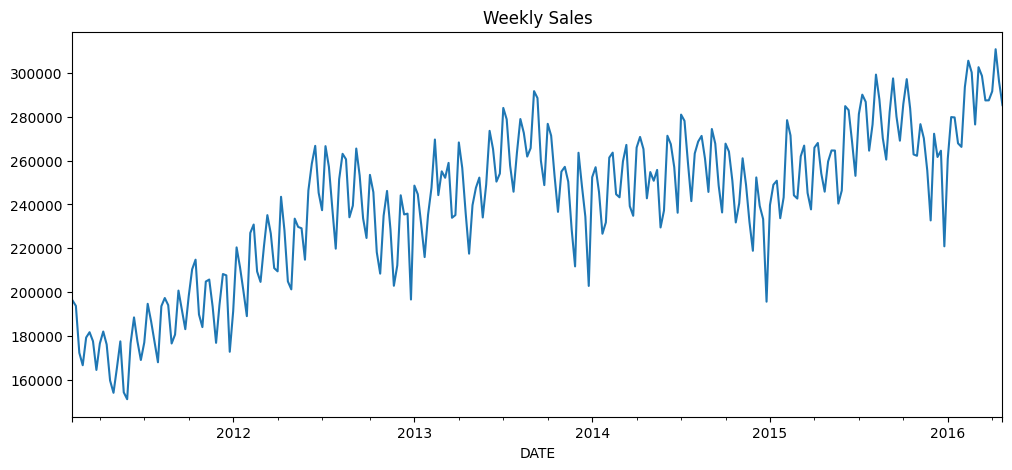

In [18]:
df.set_index("DATE").resample("W")["SALES_COUNT"].sum().plot(figsize = (12, 5), title = "Weekly Sales");

In [19]:
df["UNIQUE_DAYS_WITH_SALES"] = df["DATE"]
df["TOTAL_TRANSACTIONS"] = df["SALES_COUNT"]

In [20]:
df_monthly_agg = df.set_index("DATE").groupby(["ID"]).resample("W").agg(
    {
        "SALES_COUNT":np.sum,
        "REVENUE":np.sum,
        "UNIQUE_DAYS_WITH_SALES":lambda dates: len(set(dates)),
        "TOTAL_TRANSACTIONS":len,
        "SELL_PRICE":np.mean
    }
).rename(
    columns = {
        "SALES_COUNT":"WEEKLY_SALES",
        "REVENUE":"WEEKLY_REVENUE",
        "SELL_PRICE":"WEEKLY_MEAN_PRICE"
    }
).reset_index()

In [21]:
df_monthly_agg.to_csv('./data_dsmarket/preproc_data/monthly_agg.csv')

In [22]:
df_monthly_agg = pd.read_csv('./data_dsmarket/preproc_data/monthly_agg.csv')

In [23]:
df_monthly_agg.head()

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
0,0,ACCESORIES_1_001_BOS_1,2011-02-06,0,0.0,1,1,NaN
1,1,ACCESORIES_1_001_BOS_1,2011-02-13,0,0.0,1,1,NaN
2,2,ACCESORIES_1_001_BOS_1,2011-02-20,0,0.0,1,1,NaN
3,3,ACCESORIES_1_001_BOS_1,2011-02-27,0,0.0,1,1,NaN
4,4,ACCESORIES_1_001_BOS_1,2011-03-06,0,0.0,1,1,NaN


In [24]:
df_monthly_agg[df_monthly_agg['DATE'] == '2011-10-09']

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
35,35,ACCESORIES_1_001_BOS_1,2011-10-09,0,0.0,1,1,NaN
308,308,ACCESORIES_1_001_BOS_2,2011-10-09,0,0.0,1,1,NaN
581,581,ACCESORIES_1_001_BOS_3,2011-10-09,0,0.0,1,1,NaN
854,854,ACCESORIES_1_001_NYC_1,2011-10-09,0,0.0,1,1,NaN
1127,1127,ACCESORIES_1_001_NYC_2,2011-10-09,0,0.0,1,1,NaN
...,...,...,...,...,...,...,...,...
8322440,8322440,SUPERMARKET_3_827_NYC_3,2011-10-09,0,0.0,1,1,NaN
8322713,8322713,SUPERMARKET_3_827_NYC_4,2011-10-09,0,0.0,1,1,NaN
8322986,8322986,SUPERMARKET_3_827_PHI_1,2011-10-09,0,0.0,1,1,NaN
8323259,8323259,SUPERMARKET_3_827_PHI_2,2011-10-09,0,0.0,1,1,NaN


En cada fecha tenemos registrados TODOS los productos

In [25]:
df_monthly_agg[(df_monthly_agg['DATE'] == '2011-10-09') & (df_monthly_agg['WEEKLY_SALES'] > 0)]

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
2765,2765,ACCESORIES_1_002_BOS_1,2011-10-09,1,5.2801,1,1,5.2801
3038,3038,ACCESORIES_1_002_BOS_2,2011-10-09,1,5.2801,1,1,5.2801
3584,3584,ACCESORIES_1_002_NYC_1,2011-10-09,2,10.5602,1,1,5.2801
3857,3857,ACCESORIES_1_002_NYC_2,2011-10-09,1,5.2801,1,1,5.2801
4676,4676,ACCESORIES_1_002_PHI_1,2011-10-09,2,10.5602,1,1,5.2801
...,...,...,...,...,...,...,...,...
8316707,8316707,SUPERMARKET_3_825_NYC_2,2011-10-09,2,9.5520,1,1,4.7760
8316980,8316980,SUPERMARKET_3_825_NYC_3,2011-10-09,5,26.2800,1,1,5.2560
8317253,8317253,SUPERMARKET_3_825_NYC_4,2011-10-09,9,47.3040,1,1,5.2560
8317526,8317526,SUPERMARKET_3_825_PHI_1,2011-10-09,2,10.5120,1,1,5.2560


In [26]:
df_monthly_agg["CHECK"] = df_monthly_agg["UNIQUE_DAYS_WITH_SALES"] == df_monthly_agg["TOTAL_TRANSACTIONS"]

In [27]:
df_monthly_agg[df_monthly_agg["CHECK"] == True].sample(5)

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK
2741636,2741636,HOME_&_GARDEN_1_449_BOS_3,2014-05-11,8,149.700,1,1,18.7125,True
8319044,8319044,SUPERMARKET_3_826_BOS_3,2014-09-14,8,12.288,1,1,1.5360,True
4283541,4283541,HOME_&_GARDEN_2_474_BOS_1,2014-05-18,0,0.000,1,1,9.3375,True
4227562,4227562,HOME_&_GARDEN_2_453_NYC_3,2014-02-09,20,161.750,1,1,8.0875,True
8102300,8102300,SUPERMARKET_3_746_PHI_2,2015-01-18,12,27.072,1,1,2.2560,True


Como tenemos todos los productos por todas las fechas, el check no nos permite ver los dias con mas de una venta por producto

In [28]:
check_months = df_monthly_agg.groupby("ID").size()
check_months.sample(3)

ID
SUPERMARKET_3_567_NYC_4      273
HOME_&_GARDEN_1_340_PHI_2    273
SUPERMARKET_3_426_BOS_2      273
dtype: int64

In [29]:
check_months[check_months != 273].shape

(0,)

In [30]:
DATE_PREDICTION = np.datetime64("2016-05-31")
date_range = pd.date_range(MIN_DATE, DATE_PREDICTION, freq = "W")
date_range

DatetimeIndex(['2011-02-06', '2011-02-13', '2011-02-20', '2011-02-27',
               '2011-03-06', '2011-03-13', '2011-03-20', '2011-03-27',
               '2011-04-03', '2011-04-10',
               ...
               '2016-03-27', '2016-04-03', '2016-04-10', '2016-04-17',
               '2016-04-24', '2016-05-01', '2016-05-08', '2016-05-15',
               '2016-05-22', '2016-05-29'],
              dtype='datetime64[ns]', length=278, freq='W-SUN')

In [31]:
date_range.value_counts()

2011-02-06    1
2014-08-10    1
2014-09-21    1
2014-09-14    1
2014-09-07    1
             ..
2012-12-23    1
2012-12-30    1
2013-01-06    1
2013-01-13    1
2016-05-29    1
Length: 278, dtype: int64

In [32]:
unique_id = sorted(df_monthly_agg["ID"].unique())
unique_id[:3]

['ACCESORIES_1_001_BOS_1', 'ACCESORIES_1_001_BOS_2', 'ACCESORIES_1_001_BOS_3']

In [33]:
len(unique_id)

30490

In [34]:
cartesian_product = pd.MultiIndex.from_product([date_range, unique_id], names = ["DATE", "ID"])
len(cartesian_product)

8476220

In [35]:
30490 * 278

8476220

In [36]:
events = ['DATE']
for col in df.columns:
    if df[col].dtype == 'bool':
        events.append(col)

not_events = df.columns[~df.columns.isin(events)]

df_month = df[not_events]
events_df = df[events]

In [37]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
8323765,2016-03-27,False,False,False,False,False
8323766,2016-04-03,False,False,False,False,False
8323767,2016-04-10,False,False,False,False,False
8323768,2016-04-17,False,False,False,False,False


In [38]:
df_monthly_agg['DATE'] = pd.to_datetime(df_monthly_agg['DATE'], format = "%Y-%m-%d")

In [39]:
full_df = pd.DataFrame(index = cartesian_product).reset_index()

print(full_df.shape)

full_df = full_df.merge(df_monthly_agg, on = ['DATE','ID'], how = 'left')

print(full_df.shape)

(8476220, 2)
(8476220, 9)


In [40]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
8323765,2016-03-27,False,False,False,False,False
8323766,2016-04-03,False,False,False,False,False
8323767,2016-04-10,False,False,False,False,False
8323768,2016-04-17,False,False,False,False,False


In [41]:
events_df.drop_duplicates(inplace=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_26104\3921119319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df.drop_duplicates(inplace=True)


In [42]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
268,2016-03-27,False,False,False,False,False
269,2016-04-03,False,False,False,False,False
270,2016-04-10,False,False,False,False,False
271,2016-04-17,False,False,False,False,False


In [43]:
full_df = full_df.merge(events_df, on = ['DATE'], how = 'left')

In [44]:
full_df.shape

(8476220, 14)

In [45]:
full_df.sample(5)

,DATE,ID,Unnamed: 0,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
3654437,2013-05-19,SUPERMARKET_3_388_PHI_1,7132790.0,0.0,0.0000,1.0,1.0,5.2560,True,False,False,False,False,False
5079642,2014-04-13,SUPERMARKET_2_003_BOS_3,4996612.0,5.0,13.0800,1.0,1.0,2.6160,True,False,False,False,False,False
6674692,2015-04-12,SUPERMARKET_3_563_BOS_3,7609274.0,0.0,0.0000,1.0,1.0,4.5360,True,False,False,False,False,False
4585652,2013-12-22,HOME_&_GARDEN_2_119_BOS_3,3317646.0,0.0,0.0000,1.0,1.0,7.3000,True,False,False,False,False,False
7287934,2015-09-06,ACCESORIES_1_085_NYC_2,225191.0,7.0,137.0432,1.0,1.0,19.5776,True,False,False,False,False,False


In [46]:
add_info = df[
    ["ID", "ITEM", "ITEM_ID", "ITEM_CATEGORY", "ITEM_CATEGORY_ID", "ITEM_DEPARTMENT", "ITEM_DEPARTMENT_ID", "STORE_CODE",
     "REGION", "REGION_ID", "STORE", "STORE_ID"]
].drop_duplicates()

add_info.head(3)

,ID,ITEM,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
273,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,1.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
546,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0


In [47]:
add_info.shape

(30490, 12)

Si ponemos eventos da el numero correcto de unique ID, se crean columnas diferentes i extras debido a estos, asi que por ahora eliminamos eventos 
, "EVENT_NEWYEAR", "EVENT_NONE", "EVENT_SUPERBOWL", "EVENT_THANKSGIVING", "EVENT_RAMADAN"

In [48]:
full_df

,DATE,ID,Unnamed: 0,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,1.0,1.0,NaN,True,False,False,True,False,False
1,2011-02-06,ACCESORIES_1_001_BOS_2,273.0,0.0,0.0,1.0,1.0,NaN,True,False,False,True,False,False
2,2011-02-06,ACCESORIES_1_001_BOS_3,546.0,0.0,0.0,1.0,1.0,NaN,True,False,False,True,False,False
3,2011-02-06,ACCESORIES_1_001_NYC_1,819.0,0.0,0.0,1.0,1.0,NaN,True,False,False,True,False,False
4,2011-02-06,ACCESORIES_1_001_NYC_2,1092.0,0.0,0.0,1.0,1.0,NaN,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476215,2016-05-29,SUPERMARKET_3_827_NYC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476216,2016-05-29,SUPERMARKET_3_827_NYC_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476217,2016-05-29,SUPERMARKET_3_827_PHI_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476218,2016-05-29,SUPERMARKET_3_827_PHI_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
print(full_df.shape)

full_df = full_df.merge(add_info, how = "left", on = "ID")

print(full_df.shape)

(8476220, 14)
(8476220, 25)


In [50]:
full_df.drop(["CHECK", 'Unnamed: 0'], axis = 1, inplace = True)

In [51]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476220 entries, 0 to 8476219
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DATE                    datetime64[ns]
 1   ID                      object        
 2   WEEKLY_SALES            float64       
 3   WEEKLY_REVENUE          float64       
 4   UNIQUE_DAYS_WITH_SALES  float64       
 5   TOTAL_TRANSACTIONS      float64       
 6   WEEKLY_MEAN_PRICE       float64       
 7   EVENT_NEWYEAR           object        
 8   EVENT_NONE              object        
 9   EVENT_SUPERBOWL         object        
 10  EVENT_THANKSGIVING      object        
 11  EVENT_RAMADAN           object        
 12  ITEM                    object        
 13  ITEM_ID                 float64       
 14  ITEM_CATEGORY           object        
 15  ITEM_CATEGORY_ID        float64       
 16  ITEM_DEPARTMENT         object        
 17  ITEM_DEPARTMENT_ID      float64       
 18  ST

In [52]:
full_df.isnull().sum()

DATE                            0
ID                              0
WEEKLY_SALES               152450
WEEKLY_REVENUE             152450
UNIQUE_DAYS_WITH_SALES     152450
TOTAL_TRANSACTIONS         152450
WEEKLY_MEAN_PRICE         1909509
EVENT_NEWYEAR              152450
EVENT_NONE                 152450
EVENT_SUPERBOWL            152450
EVENT_THANKSGIVING         152450
EVENT_RAMADAN              152450
ITEM                            0
ITEM_ID                         0
ITEM_CATEGORY                   0
ITEM_CATEGORY_ID                0
ITEM_DEPARTMENT                 0
ITEM_DEPARTMENT_ID              0
STORE_CODE                      0
REGION                          0
REGION_ID                       0
STORE                           0
STORE_ID                        0
dtype: int64

In [53]:
full_df["WEEKLY_SALES"].fillna(0, inplace = True)
full_df["WEEKLY_REVENUE"].fillna(0, inplace = True)
full_df["UNIQUE_DAYS_WITH_SALES"].fillna(0, inplace = True)
full_df["TOTAL_TRANSACTIONS"].fillna(0, inplace = True)

In [54]:
full_df.isnull().sum()

DATE                            0
ID                              0
WEEKLY_SALES                    0
WEEKLY_REVENUE                  0
UNIQUE_DAYS_WITH_SALES          0
TOTAL_TRANSACTIONS              0
WEEKLY_MEAN_PRICE         1909509
EVENT_NEWYEAR              152450
EVENT_NONE                 152450
EVENT_SUPERBOWL            152450
EVENT_THANKSGIVING         152450
EVENT_RAMADAN              152450
ITEM                            0
ITEM_ID                         0
ITEM_CATEGORY                   0
ITEM_CATEGORY_ID                0
ITEM_DEPARTMENT                 0
ITEM_DEPARTMENT_ID              0
STORE_CODE                      0
REGION                          0
REGION_ID                       0
STORE                           0
STORE_ID                        0
dtype: int64

In [55]:
full_df.head()

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID
0,2011-02-06,ACCESORIES_1_001_BOS_1,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0
1,2011-02-06,ACCESORIES_1_001_BOS_2,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0
2,2011-02-06,ACCESORIES_1_001_BOS_3,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0
3,2011-02-06,ACCESORIES_1_001_NYC_1,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
4,2011-02-06,ACCESORIES_1_001_NYC_2,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0


In [56]:
full_df['MONTH'] = full_df['DATE'].dt.month
full_df['DAY'] = full_df['DATE'].dt.day

In [57]:
events.remove('DATE')

In [58]:
events.remove('EVENT_NONE')

In [59]:
events

['EVENT_NEWYEAR', 'EVENT_SUPERBOWL', 'EVENT_THANKSGIVING', 'EVENT_RAMADAN']

In [60]:
full_df['EVENT_NONE'].fillna(True, inplace=True)

In [61]:
for event in events:
    full_df[event].fillna(False, inplace=True)

In [62]:
full_df

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID,MONTH,DAY
0,2011-02-06,ACCESORIES_1_001_BOS_1,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0,2,6
1,2011-02-06,ACCESORIES_1_001_BOS_2,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0,2,6
2,2011-02-06,ACCESORIES_1_001_BOS_3,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0,2,6
3,2011-02-06,ACCESORIES_1_001_NYC_1,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0,2,6
4,2011-02-06,ACCESORIES_1_001_NYC_2,0.0,0.0,1.0,1.0,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476215,2016-05-29,SUPERMARKET_3_827_NYC_3,0.0,0.0,0.0,0.0,NaN,False,True,False,...,2.0,SUPERMARKET_3,6.0,NYC_3,New York,1.0,Tribeca,8.0,5,29
8476216,2016-05-29,SUPERMARKET_3_827_NYC_4,0.0,0.0,0.0,0.0,NaN,False,True,False,...,2.0,SUPERMARKET_3,6.0,NYC_4,New York,1.0,Brooklyn,1.0,5,29
8476217,2016-05-29,SUPERMARKET_3_827_PHI_1,0.0,0.0,0.0,0.0,NaN,False,True,False,...,2.0,SUPERMARKET_3,6.0,PHI_1,Philadelphia,2.0,Midtown_Village,4.0,5,29
8476218,2016-05-29,SUPERMARKET_3_827_PHI_2,0.0,0.0,0.0,0.0,NaN,False,True,False,...,2.0,SUPERMARKET_3,6.0,PHI_2,Philadelphia,2.0,Yorktown,9.0,5,29


In [63]:
sample_series = full_df[full_df["ID"] == "ACCESORIES_1_001_NYC_1"][["DATE", "ID", "WEEKLY_MEAN_PRICE"]]
sample_series

,DATE,ID,WEEKLY_MEAN_PRICE
3,2011-02-06,ACCESORIES_1_001_NYC_1,NaN
30493,2011-02-13,ACCESORIES_1_001_NYC_1,NaN
60983,2011-02-20,ACCESORIES_1_001_NYC_1,NaN
91473,2011-02-27,ACCESORIES_1_001_NYC_1,NaN
121963,2011-03-06,ACCESORIES_1_001_NYC_1,NaN
...,...,...,...
8323773,2016-05-01,ACCESORIES_1_001_NYC_1,NaN
8354263,2016-05-08,ACCESORIES_1_001_NYC_1,NaN
8384753,2016-05-15,ACCESORIES_1_001_NYC_1,NaN
8415243,2016-05-22,ACCESORIES_1_001_NYC_1,NaN


In [64]:
full_df["WEEKLY_MEAN_PRICE"] = full_df.groupby("ID")["WEEKLY_MEAN_PRICE"].apply(
    lambda series: series.backfill().ffill()
)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_26104\2052045608.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  full_df["WEEKLY_MEAN_PRICE"] = full_df.groupby("ID")["WEEKLY_MEAN_PRICE"].apply(


Los nulos que nos aparecen los tenemos por el mes que hemos añadido. Como nos sale este error de momento los imputampos por 0

In [65]:
full_df["WEEKLY_MEAN_PRICE"].isnull().sum()

0

In [66]:
del df, cartesian_product, unique_id, date_range, add_info, sample_series, check_months

In [67]:
def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2)
    plot_pacf(x = y, ax = ax3)

    plt.suptitle(t = title, fontsize = 20)

In [68]:
y = full_df.set_index("DATE").resample("W")["WEEKLY_SALES"].sum()

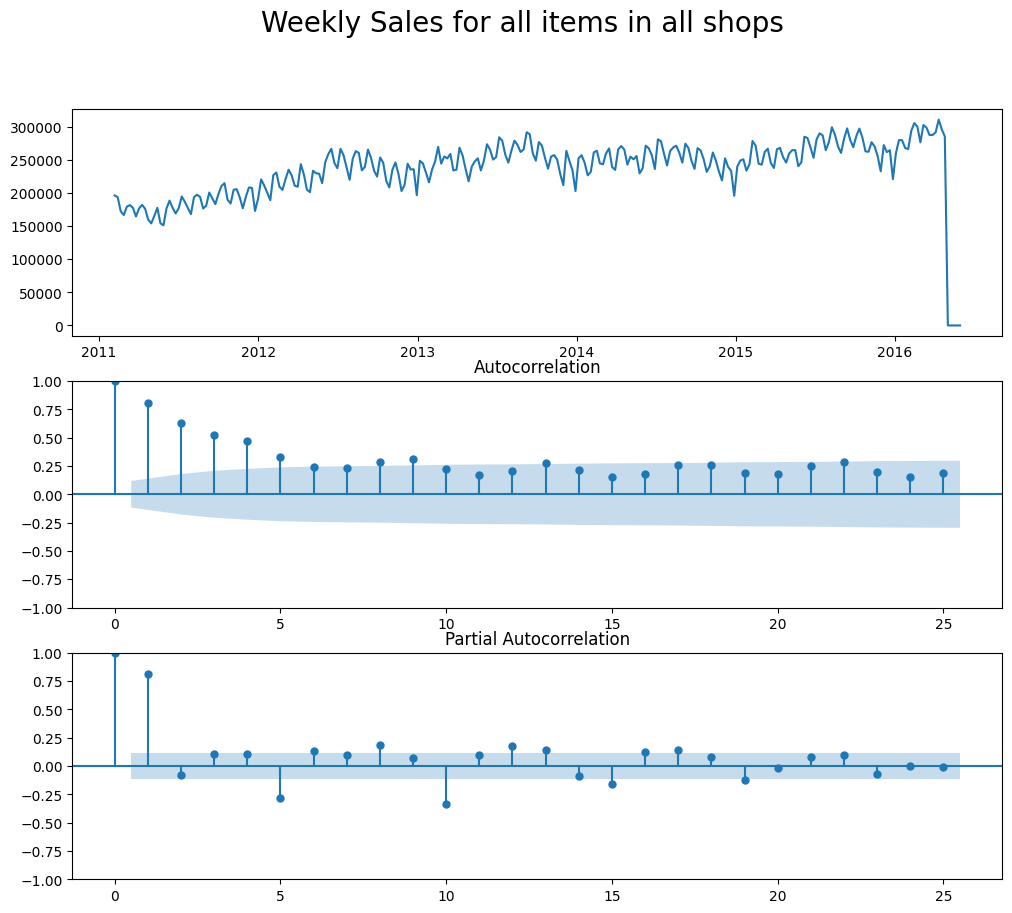

In [69]:
plot_ts_acf_pacf(y = y, title = "Weekly Sales for all items in all shops");

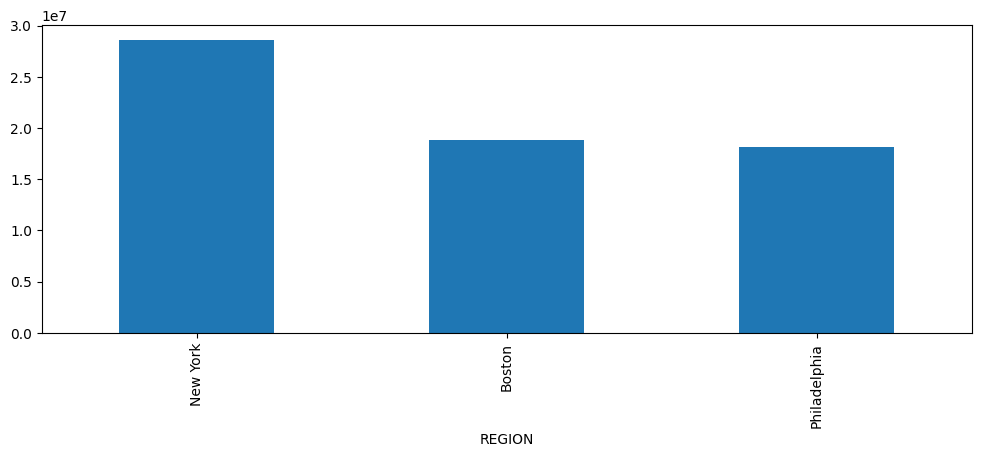

In [70]:
(
    full_df.
    groupby(["REGION"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

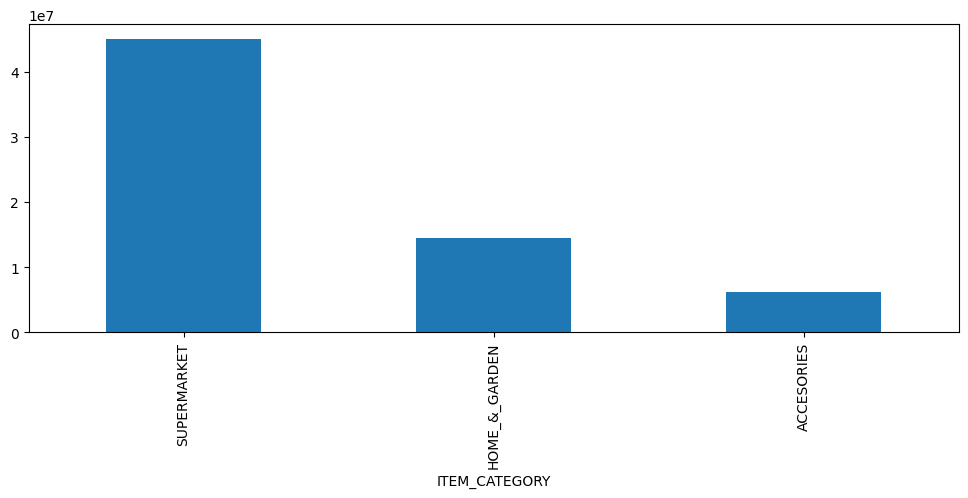

In [71]:
(
    full_df.
    groupby(["ITEM_CATEGORY"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

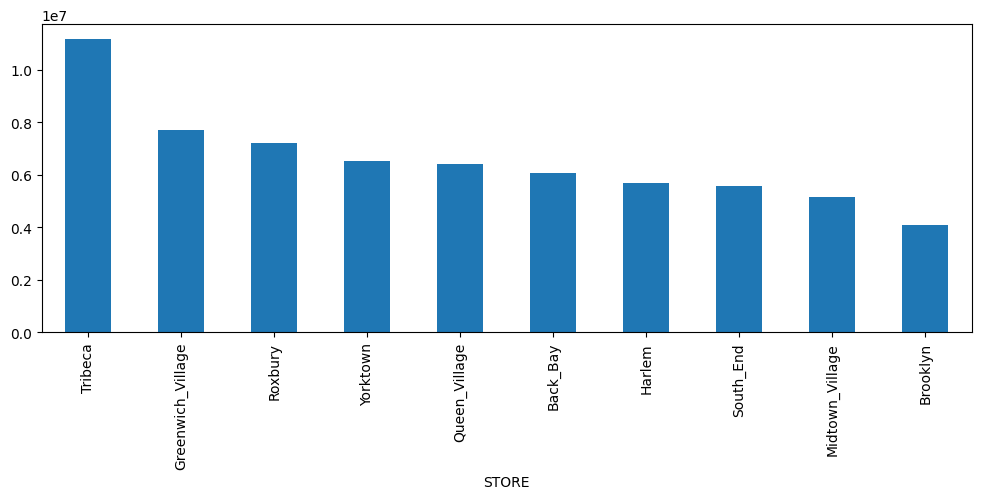

In [72]:
(
    full_df.
    groupby(["STORE"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

In [73]:
full_df.head()

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID,MONTH,DAY
0,2011-02-06,ACCESORIES_1_001_BOS_1,0.0,0.0,1.0,1.0,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0,2,6
1,2011-02-06,ACCESORIES_1_001_BOS_2,0.0,0.0,1.0,1.0,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0,2,6
2,2011-02-06,ACCESORIES_1_001_BOS_3,0.0,0.0,1.0,1.0,11.4646,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0,2,6
3,2011-02-06,ACCESORIES_1_001_NYC_1,0.0,0.0,1.0,1.0,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0,2,6
4,2011-02-06,ACCESORIES_1_001_NYC_2,0.0,0.0,1.0,1.0,10.9858,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0,2,6


In [74]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476220 entries, 0 to 8476219
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DATE                    datetime64[ns]
 1   ID                      object        
 2   WEEKLY_SALES            float64       
 3   WEEKLY_REVENUE          float64       
 4   UNIQUE_DAYS_WITH_SALES  float64       
 5   TOTAL_TRANSACTIONS      float64       
 6   WEEKLY_MEAN_PRICE       float64       
 7   EVENT_NEWYEAR           bool          
 8   EVENT_NONE              bool          
 9   EVENT_SUPERBOWL         bool          
 10  EVENT_THANKSGIVING      bool          
 11  EVENT_RAMADAN           bool          
 12  ITEM                    object        
 13  ITEM_ID                 float64       
 14  ITEM_CATEGORY           object        
 15  ITEM_CATEGORY_ID        float64       
 16  ITEM_DEPARTMENT         object        
 17  ITEM_DEPARTMENT_ID      float64       
 18  ST

In [ ]:
COLUMNS_TO_DROP = [
    'WEEKLY_REVENUE',
    'UNIQUE_DAYS_WITH_SALES',
    'TOTAL_TRANSACTIONS',
    'ITEM',
    'ITEM_CATEGORY',
    'ITEM_DEPARTMENT',
    'REGION',
    'STORE',
]

full_df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [76]:
full_df.set_index("ID", inplace = True)

In [91]:
full_df.sample(5)

,DATE,WEEKLY_SALES,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,MONTH,DAY
ID,,,,,,,,,,,,,,,
SUPERMARKET_3_573_NYC_2,2013-03-10,0.0,1.2000,False,False,False,False,False,2797.0,2.0,6.0,1.0,3.0,3,10
SUPERMARKET_2_241_NYC_3,2011-09-25,0.0,2.8560,False,False,False,False,False,2067.0,2.0,5.0,1.0,8.0,9,25
HOME_&_GARDEN_1_528_NYC_4,2014-05-18,5.0,3.7125,False,False,False,False,False,1083.0,1.0,2.0,1.0,1.0,5,18
SUPERMARKET_3_199_NYC_2,2016-05-29,0.0,3.0720,False,True,False,False,False,2423.0,2.0,6.0,1.0,3.0,5,29
ACCESORIES_1_337_NYC_1,2014-10-19,16.0,4.8811,False,False,False,False,False,328.0,0.0,0.0,1.0,2.0,10,19


In [78]:
full_df.drop('STORE_CODE', inplace = True, axis = 1)

In [79]:
full_df.sample(5)

,DATE,WEEKLY_SALES,WEEKLY_REVENUE,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,MONTH,DAY
ID,,,,,,,,,,,,,,,,
SUPERMARKET_1_091_BOS_1,2011-02-13,2.0,5.712,2.8560,False,False,False,False,False,1701.0,2.0,4.0,0.0,7.0,2,13
SUPERMARKET_3_817_PHI_2,2014-08-31,3.0,10.368,3.4560,False,False,False,False,False,3038.0,2.0,6.0,2.0,9.0,8,31
HOME_&_GARDEN_1_190_BOS_1,2011-11-06,0.0,0.000,6.2125,False,False,False,False,False,750.0,1.0,2.0,0.0,7.0,11,6
SUPERMARKET_3_588_PHI_3,2014-03-02,0.0,0.000,4.7760,False,False,False,False,False,2812.0,2.0,6.0,2.0,5.0,3,2
HOME_&_GARDEN_2_052_PHI_3,2013-09-22,0.0,0.000,6.2125,False,False,False,False,False,1148.0,1.0,3.0,2.0,5.0,9,22


In [92]:
train_index = sorted(list(full_df["DATE"].unique()))[:-2]

valida_index = [sorted(list(full_df["DATE"].unique()))[-2]]

test_index = [sorted(list(full_df["DATE"].unique()))[-1]]

In [93]:
X_train = full_df[full_df["DATE"].isin(train_index)].drop(['WEEKLY_SALES', "DATE"], axis=1)
Y_train = full_df[full_df["DATE"].isin(train_index)]['WEEKLY_SALES']

X_valida = full_df[full_df["DATE"].isin(valida_index)].drop(['WEEKLY_SALES', "DATE"], axis=1)
Y_valida = full_df[full_df["DATE"].isin(valida_index)]['WEEKLY_SALES']

X_test = full_df[full_df["DATE"].isin(test_index)].drop(['WEEKLY_SALES', "DATE"], axis = 1)
Y_test = full_df[full_df["DATE"].isin(test_index)]['WEEKLY_SALES']

In [94]:
model = xgb.XGBRegressor(eval_metric = "rmse", early_stopping_rounds = 30, seed = 175)

model_name = str(model).split("(")[0]

day = str(datetime.now()).split()[0].replace("-", "_")
hour = str(datetime.now()).split()[1].replace(":", "_").split(".")[0]
t = str(day) + "_" + str(hour)

model.fit(X_train, Y_train, 
    eval_set = [(X_train, Y_train), (X_valida, Y_valida)], 
    verbose = True)

[0]	validation_0-rmse:22.82764	validation_1-rmse:4.25633
[1]	validation_0-rmse:21.79100	validation_1-rmse:6.83897
[2]	validation_0-rmse:21.25262	validation_1-rmse:7.84885
[3]	validation_0-rmse:20.69684	validation_1-rmse:8.56388
[4]	validation_0-rmse:20.49026	validation_1-rmse:7.03497
[5]	validation_0-rmse:20.10014	validation_1-rmse:7.61614
[6]	validation_0-rmse:19.66408	validation_1-rmse:8.28561
[7]	validation_0-rmse:19.46188	validation_1-rmse:7.98003
[8]	validation_0-rmse:19.32275	validation_1-rmse:8.44418
[9]	validation_0-rmse:19.27770	validation_1-rmse:6.75933
[10]	validation_0-rmse:19.11143	validation_1-rmse:6.95007
[11]	validation_0-rmse:19.08709	validation_1-rmse:5.91687
[12]	validation_0-rmse:19.03724	validation_1-rmse:6.07992
[13]	validation_0-rmse:19.01152	validation_1-rmse:6.18250
[14]	validation_0-rmse:18.95882	validation_1-rmse:6.28128
[15]	validation_0-rmse:18.93855	validation_1-rmse:5.60477
[16]	validation_0-rmse:18.91836	validation_1-rmse:5.64401
[17]	validation_0-rmse:1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
pickle.dump(model, open("./data_dsmarket/modelos/{}_{}.dat".format(model_name, t), "wb"))
print("{}_{}.dat".format(model_name, t))

XGBRegressor_2023_05_08_22_21_51.dat


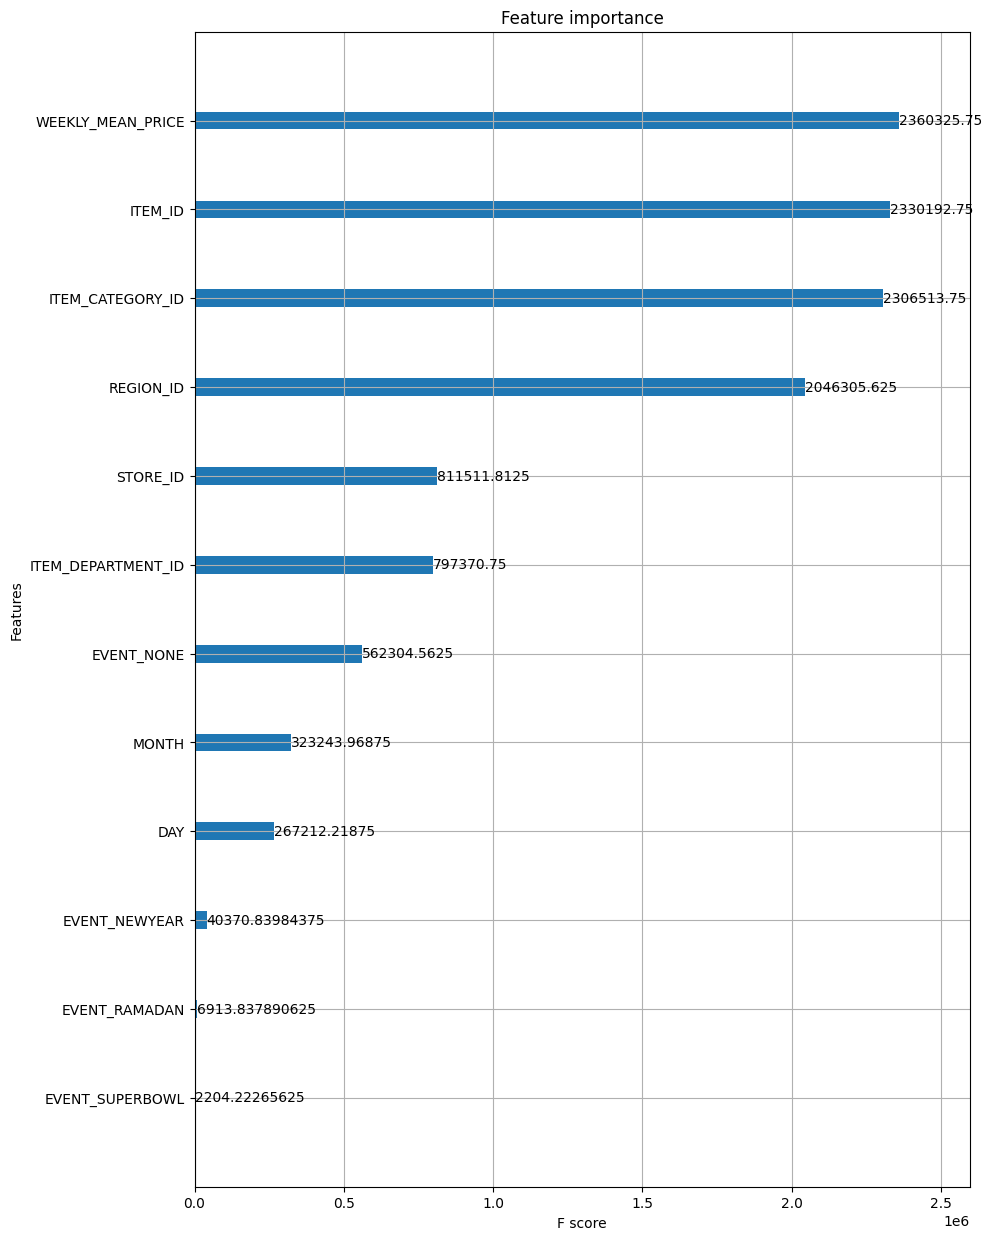

In [96]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

In [85]:
last_trained_model = pickle.load(open("./data_dsmarket/modelos/{}_{}.dat".format(model_name, t), "rb"))